In [12]:
# Import necessary libraries
import matplotlib.pyplot as plt
import os
from skimage import io
import numpy as np

Functions

In [13]:
# this function evaluates pixel accuract of the predicted masks
def pixel_acc(mask_dir, predict_dir):
    # Get the list of all file names in the mask directory
    file_list = os.listdir(mask_dir)

    # Initialize an empty list to store accuracy scores
    accuracy_scores = []

    # Loop through all files
    for file in file_list:
        # skip any non-PNG file
        if not file.endswith('.png'):
            continue
        # Create file paths
        mask_file = os.path.join(mask_dir, file)
        predict_file = os.path.join(predict_dir, file)

        # Load the images
        mask_img = io.imread(mask_file)
        predict_img = io.imread(predict_file)
        
        # Check max of images before normalization
        if np.max(mask_img) != 0:
            mask_img = mask_img / np.max(mask_img)
        if np.max(predict_img) != 0:
            predict_img = predict_img / np.max(predict_img)
        
        # Make sure that the mask and prediction are binary (0 and 1)
        mask_img = (mask_img > 0.5).astype(np.uint8)
        predict_img = (predict_img > 0.5).astype(np.uint8)
        
        # Calculate pixel accuracy
        correct_pixels = np.sum(mask_img == predict_img)
        total_pixels = mask_img.shape[0] * mask_img.shape[1]
        accuracy = correct_pixels / total_pixels

        # Append to accuracy scores list
        accuracy_scores.append(accuracy)

    # Create boxplot
    plt.boxplot(accuracy_scores)
    plt.title('Pixel Accuracy of UNET Predictions')
    plt.xlabel('UNET Model')
    plt.ylabel('Pixel Accuracy')
    plt.show()
    # print the mean pixel accuracy
    print(f"Mean pixel accuracy: {np.mean(accuracy_scores)}")


# this function evaluates Dice coefficient of the predicted masks
def dice_coef(mask_dir, predict_dir):
    # Get the list of all file names in the mask directory
    file_list = os.listdir(mask_dir)

    # Initialize an empty list to store Dice scores
    dice_scores = []

    # Loop through all files
    for file in file_list:
        # Skip any non-PNG files
        if not file.endswith('.png'):
            continue

        # Create file paths
        mask_file = os.path.join(mask_dir, file)
        predict_file = os.path.join(predict_dir, file)

        # Load the images
        mask_img = io.imread(mask_file)
        predict_img = io.imread(predict_file)
        
        # Check max of images before normalization
        if np.max(mask_img) != 0:
            mask_img = mask_img / np.max(mask_img)
        if np.max(predict_img) != 0:
            predict_img = predict_img / np.max(predict_img)
        
        # Make sure that the mask and prediction are binary (0 and 1)
        mask_img = (mask_img > 0.5).astype(np.uint8)
        predict_img = (predict_img > 0.5).astype(np.uint8)
        
        # Calculate Dice coefficient considering special cases
        if np.sum(mask_img) == 0 and np.sum(predict_img) == 0:
            dice = 1
        elif np.sum(mask_img) == 0 or np.sum(predict_img) == 0:
            dice = 0
        else:
            intersection = np.sum(predict_img * mask_img)
            dice = (2. * intersection) / (np.sum(predict_img) + np.sum(mask_img))

        # Append to Dice scores list
        dice_scores.append(dice)

    # Create boxplot
    plt.boxplot(dice_scores)
    plt.title('Dice Coefficients of UNET Predictions')
    plt.xlabel('UNET Model')
    plt.ylabel('Dice Coefficient')
    plt.show()
    # print the mean Dice coefficient
    print(f"Mean Dice coefficient: {np.mean(dice_scores)}")


# this function evaluates precision and recall of the predicted masks
def precision_recall(mask_dir, predict_dir):
    # Get the list of all file names in the mask directory
    file_list = os.listdir(mask_dir)

    # Initialize empty lists to store Precision and Recall scores
    precision_scores = []
    recall_scores = []

    # Loop through all files
    for file in file_list:
        # Skip any non-PNG files
        if not file.endswith('.png'):
            continue

        # Create file paths
        mask_file = os.path.join(mask_dir, file)
        predict_file = os.path.join(predict_dir, file)

        # Load the images
        mask_img = io.imread(mask_file)
        predict_img = io.imread(predict_file)
        
        # Check max of images before normalization
        if np.max(mask_img) != 0:
            mask_img = mask_img / np.max(mask_img)
        if np.max(predict_img) != 0:
            predict_img = predict_img / np.max(predict_img)
        
        # Make sure that the mask and prediction are binary (0 and 1)
        mask_img = (mask_img > 0.5).astype(np.uint8)
        predict_img = (predict_img > 0.5).astype(np.uint8)
        
        # Calculate True Positives (TP), False Positives (FP), and False Negatives (FN)
        TP = np.sum((predict_img == 1) & (mask_img == 1))
        FP = np.sum((predict_img == 1) & (mask_img == 0))
        FN = np.sum((predict_img == 0) & (mask_img == 1))
        
        # Calculate Precision and Recall scores and append to respective lists
        if (TP + FP) > 0:
            precision = TP / (TP + FP)
            precision_scores.append(precision)
        
        if (TP + FN) > 0:
            recall = TP / (TP + FN)
            recall_scores.append(recall)

    # Create boxplot for Precision scores
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.boxplot(precision_scores)
    plt.title('Precision of UNET Predictions')
    plt.xlabel('UNET Model')
    plt.ylabel('Precision')

    # Create boxplot for Recall scores
    plt.subplot(1,2,2)
    plt.boxplot(recall_scores)
    plt.title('Recall of UNET Predictions')
    plt.xlabel('UNET Model')
    plt.ylabel('Recall')

    plt.tight_layout()
    plt.show()  
    # print the mean Precision and Recall scores
    print(f"Mean Precision: {np.mean(precision_scores)}")
    print(f"Mean Recall: {np.mean(recall_scores)}")
      


# MR

### MR (With empty mask)

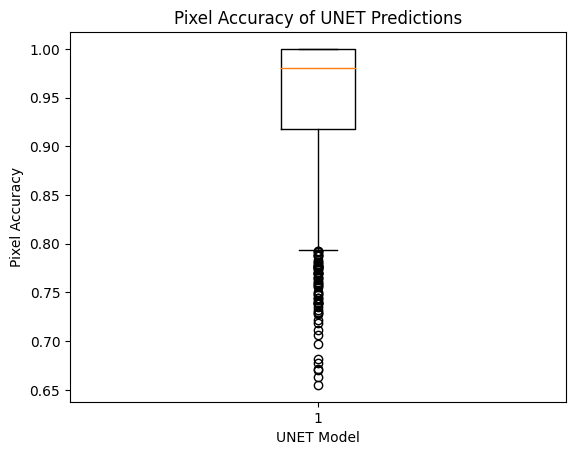

Mean pixel accuracy: 0.9495634814029585


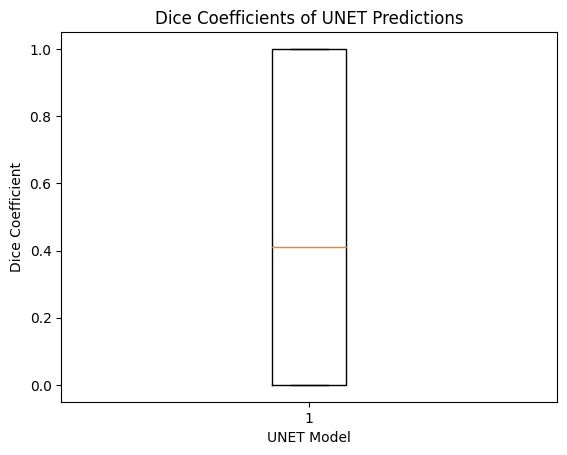

Mean Dice coefficient: 0.4554474310749652


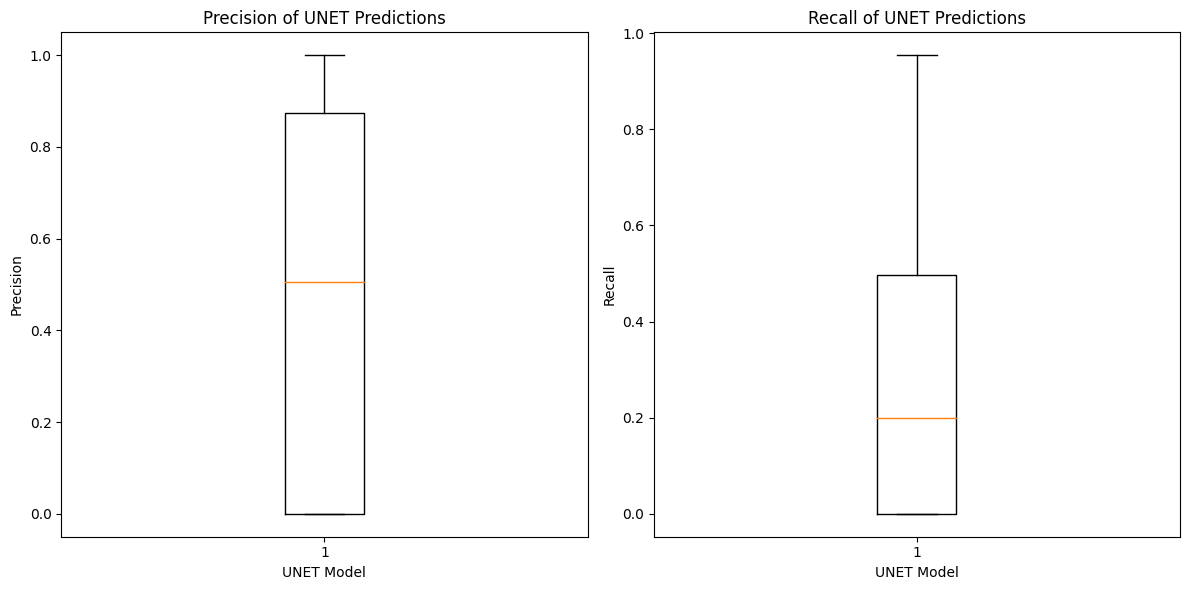

Mean Precision: 0.4533545921257551
Mean Recall: 0.27712158625022737


In [42]:
# Define the directories
mask_dir = 'dataset_mr/test/mask'
predict_dir = 'dataset_mr/test/predict_unet'
pixel_acc(mask_dir, predict_dir)
dice_coef(mask_dir, predict_dir)
precision_recall(mask_dir, predict_dir)

### MR (Without Empty Mask)

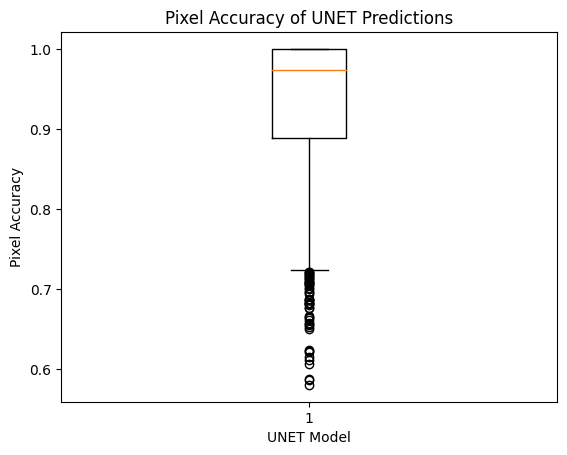

Mean pixel accuracy: 0.9329082578826866


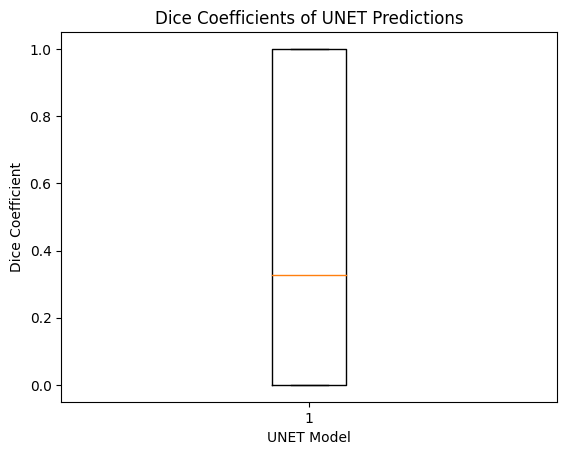

Mean Dice coefficient: 0.45029706180016316


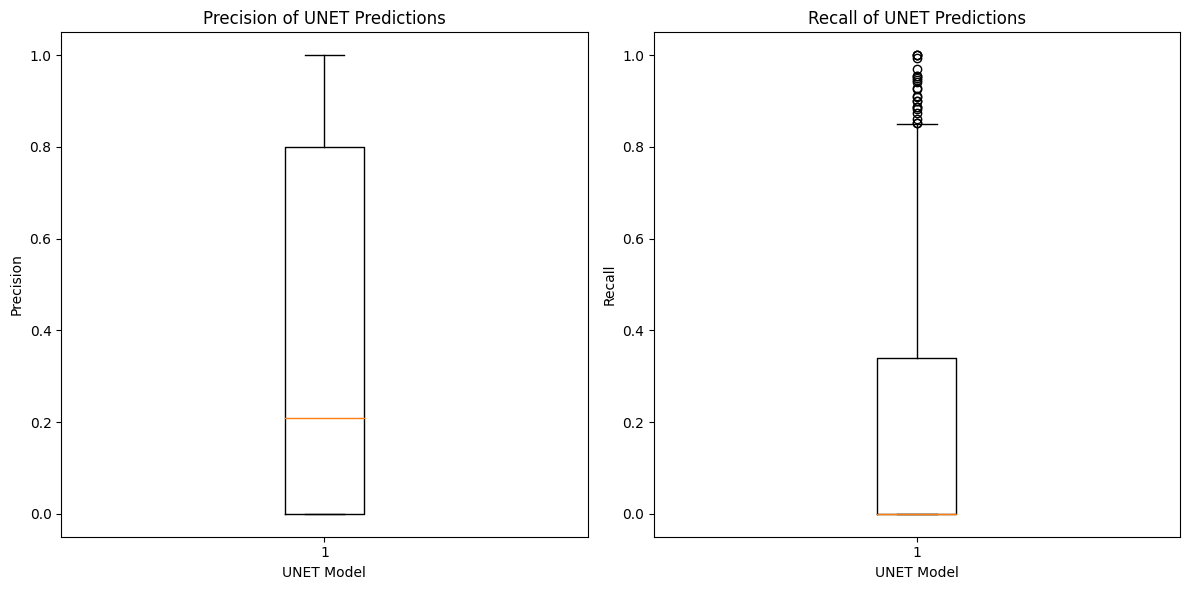

Mean Precision: 0.38380029771619345
Mean Recall: 0.189025859254814


In [43]:
# Define the directories
mask_dir = 'dataset_mr_empty_mask_removed/test/mask'
predict_dir = 'dataset_mr_empty_mask_removed/test/predict_unet'
pixel_acc(mask_dir, predict_dir)
dice_coef(mask_dir, predict_dir)
precision_recall(mask_dir, predict_dir)

# PT

### PT (With Empty Mask)

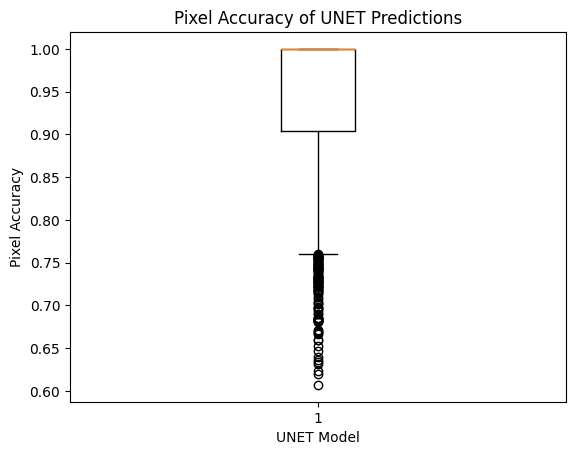

Mean pixel accuracy: 0.9408082341231401


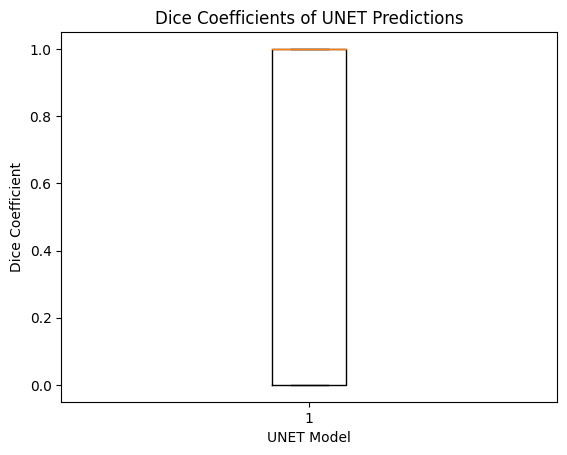

Mean Dice coefficient: 0.5077495350278983


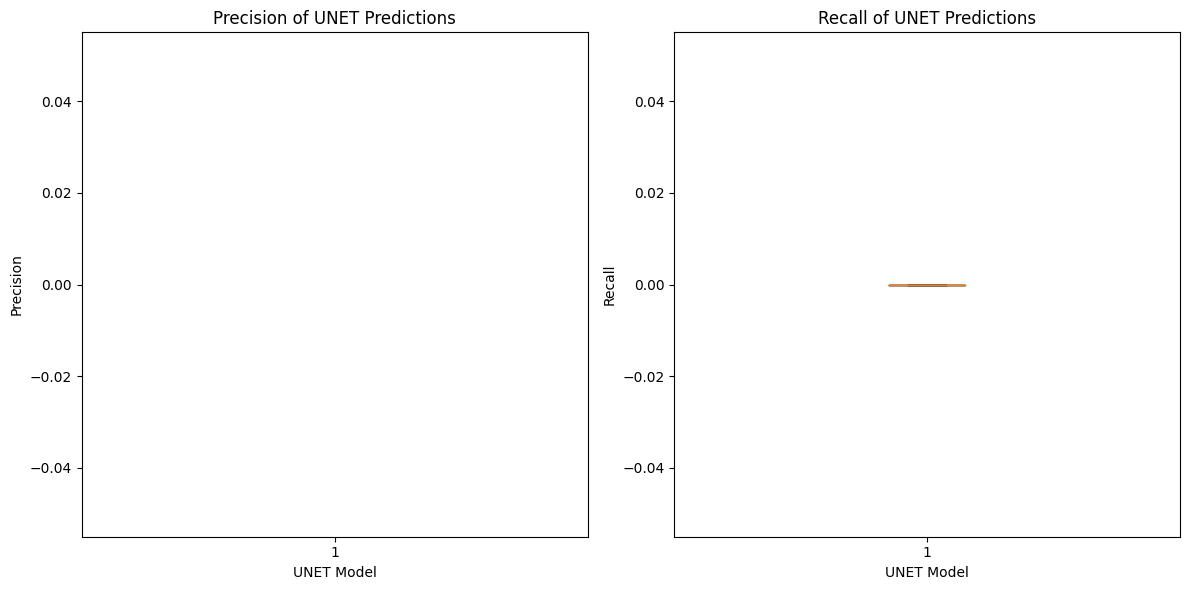

Mean Precision: nan
Mean Recall: 0.0


/Users/adrian/miniconda3/envs/mmimaging/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/adrian/miniconda3/envs/mmimaging/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [40]:
# Define the directories
mask_dir = 'dataset_pt/test/mask'
predict_dir = 'dataset_pt/test/predict_unet'
pixel_acc(mask_dir, predict_dir)
dice_coef(mask_dir, predict_dir)
precision_recall(mask_dir, predict_dir)

### PT (Without Empty Mask)

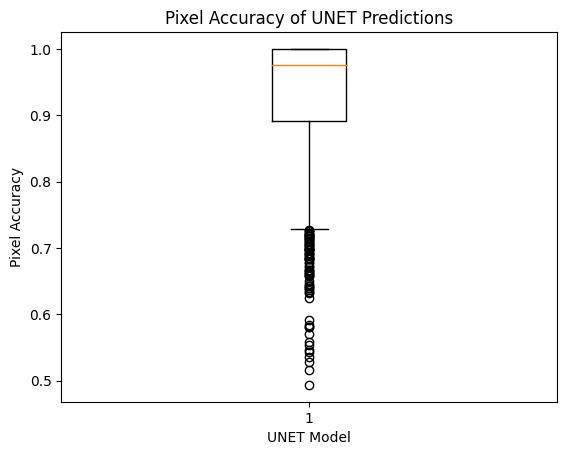

Mean pixel accuracy: 0.9310497229541228


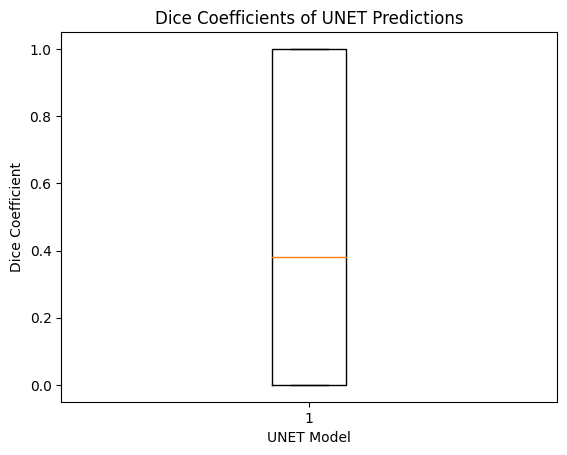

Mean Dice coefficient: 0.46093226002289744


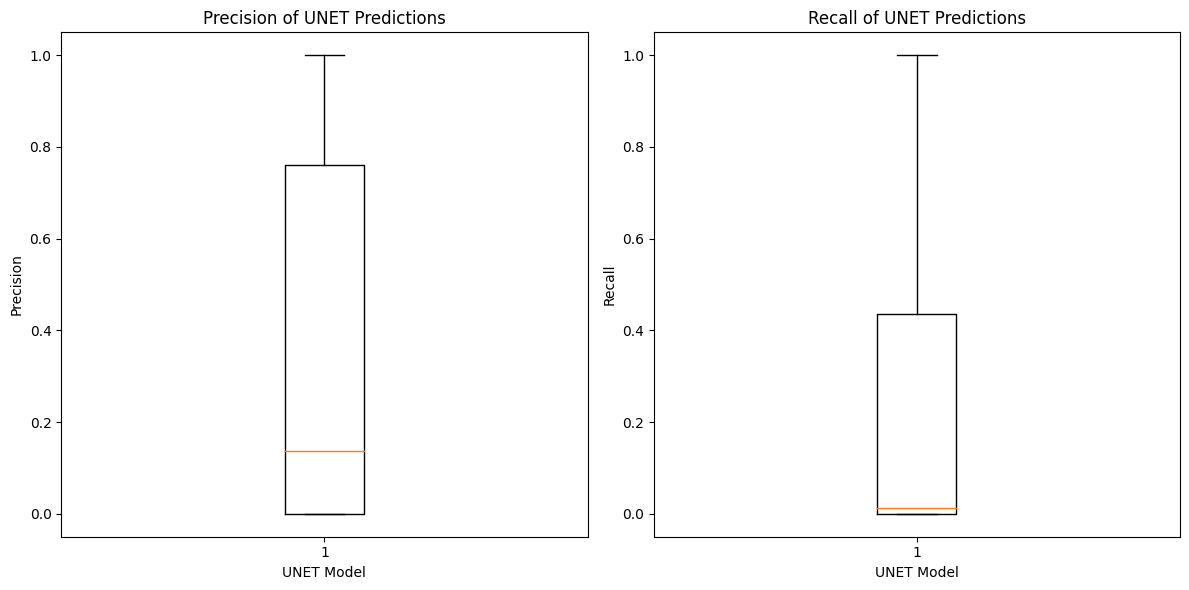

Mean Precision: 0.35821128353745707
Mean Recall: 0.22377427957142168


In [41]:
# Define the directories
mask_dir = 'dataset_pt_empty_mask_removed/test/mask'
predict_dir = 'dataset_pt_empty_mask_removed/test/predict_unet'
pixel_acc(mask_dir, predict_dir)
dice_coef(mask_dir, predict_dir)
precision_recall(mask_dir, predict_dir)

# CT

### CT (With Empty Mask)

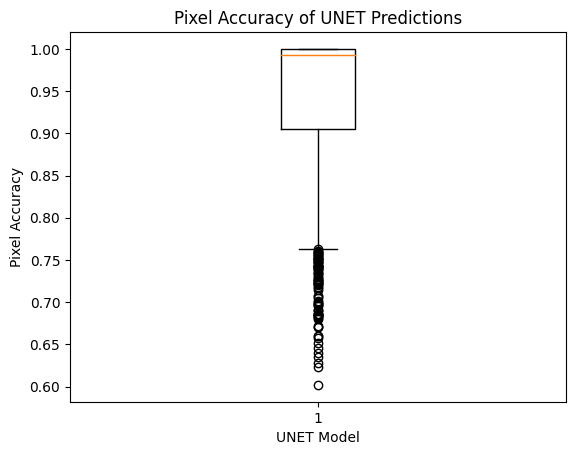

Mean pixel accuracy: 0.9429070413001782


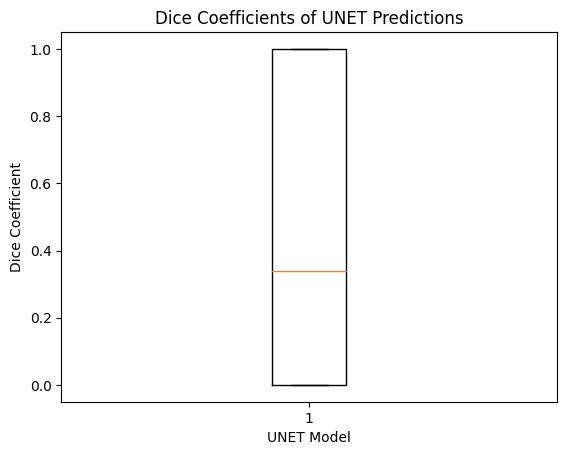

Mean Dice coefficient: 0.48995973054076714


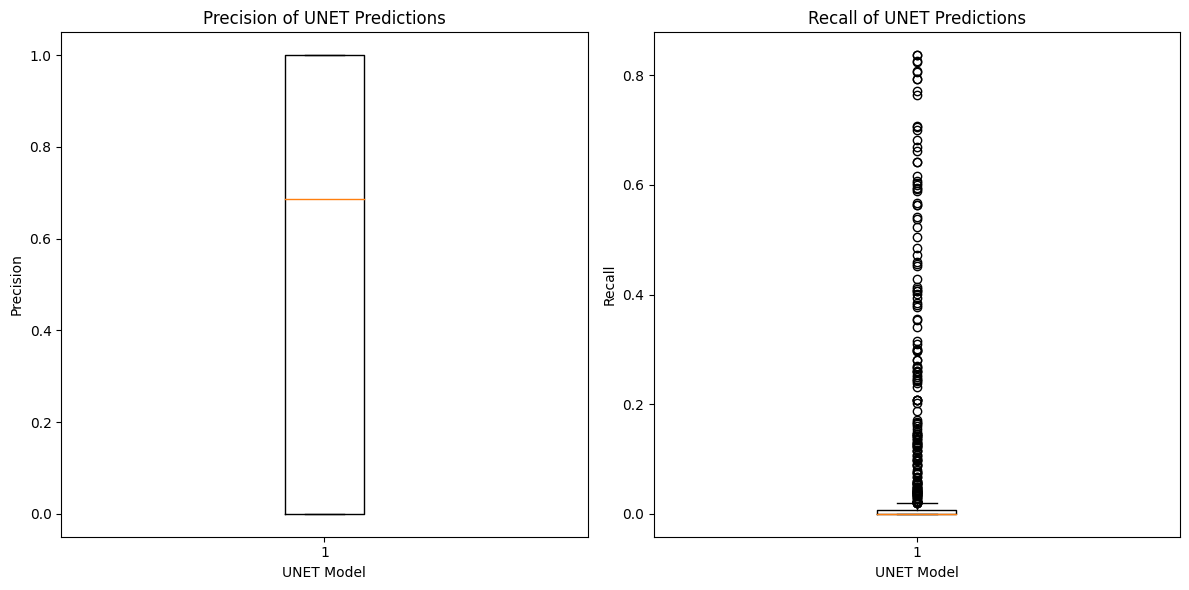

Mean Precision: 0.533299995255588
Mean Recall: 0.05481110581227436


In [44]:
# Define the directories
mask_dir = 'dataset_ct/test/mask'
predict_dir = 'dataset_ct/test/predict_unet'
pixel_acc(mask_dir, predict_dir)
dice_coef(mask_dir, predict_dir)
precision_recall(mask_dir, predict_dir)

### CT (Without Empty Mask)

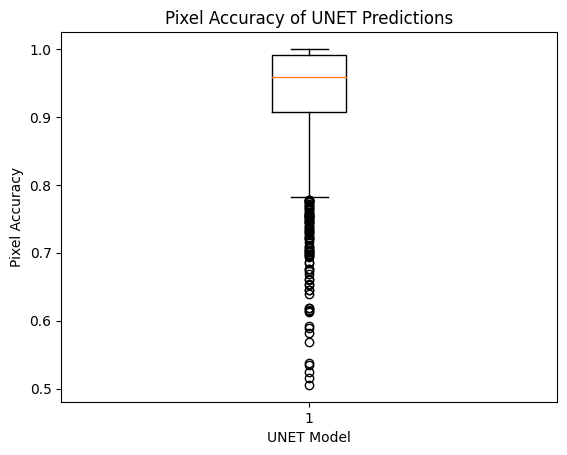

Mean pixel accuracy: 0.9348423786955595


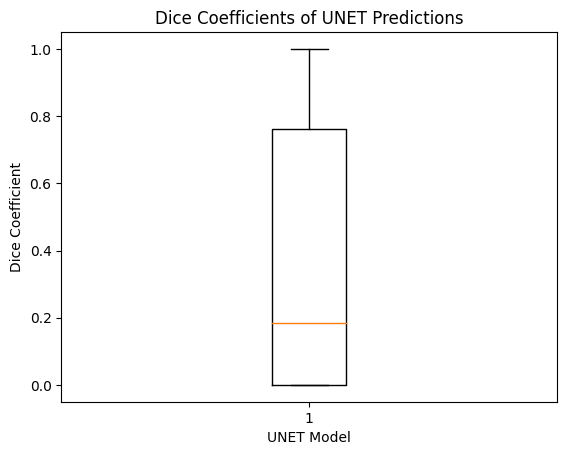

Mean Dice coefficient: 0.3679509338404677


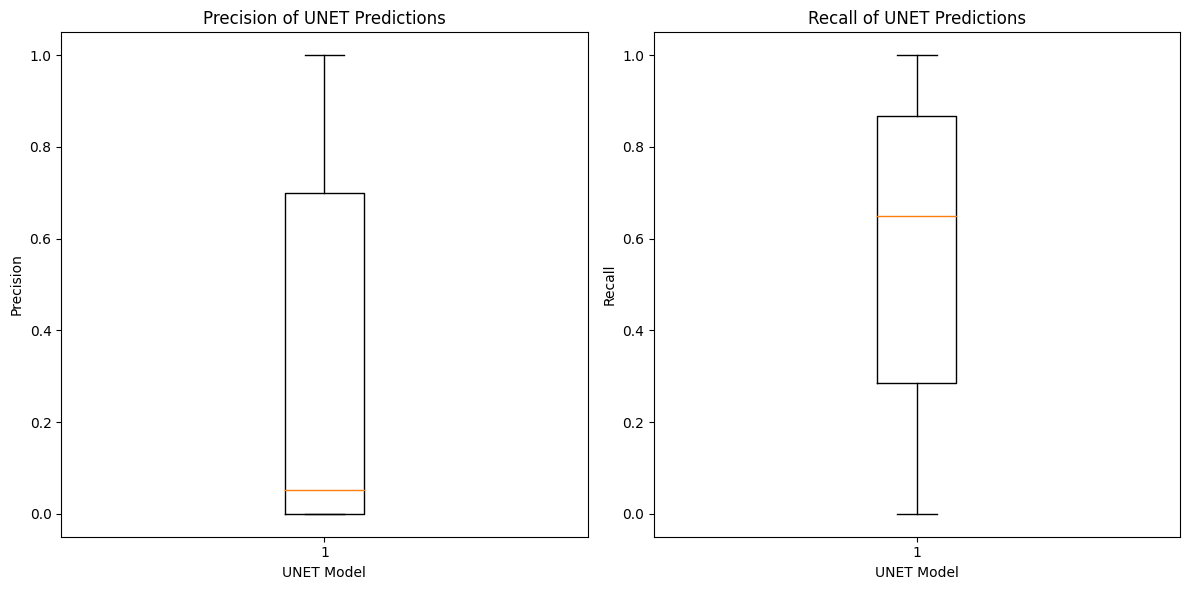

Mean Precision: 0.3148548721712431
Mean Recall: 0.5719355051365462


In [15]:
# Define the directories
mask_dir = 'dataset_ct_empty_mask_removed/test/mask'
predict_dir = 'dataset_ct_empty_mask_removed/test/predict_unet'
pixel_acc(mask_dir, predict_dir)
dice_coef(mask_dir, predict_dir)
precision_recall(mask_dir, predict_dir)

# Training Evaluation

In [8]:
import pickle 

with open('UNET/output/history.pkl', 'rb') as file:
    loaded_history = pickle.load(file)

# Access training loss, test loss, and dice score
train_loss = loaded_history["train_loss"]
test_loss = loaded_history["test_loss"]
test_dice = loaded_history["test_dice"]

test_dice = [t.cpu().numpy() for t in test_dice]


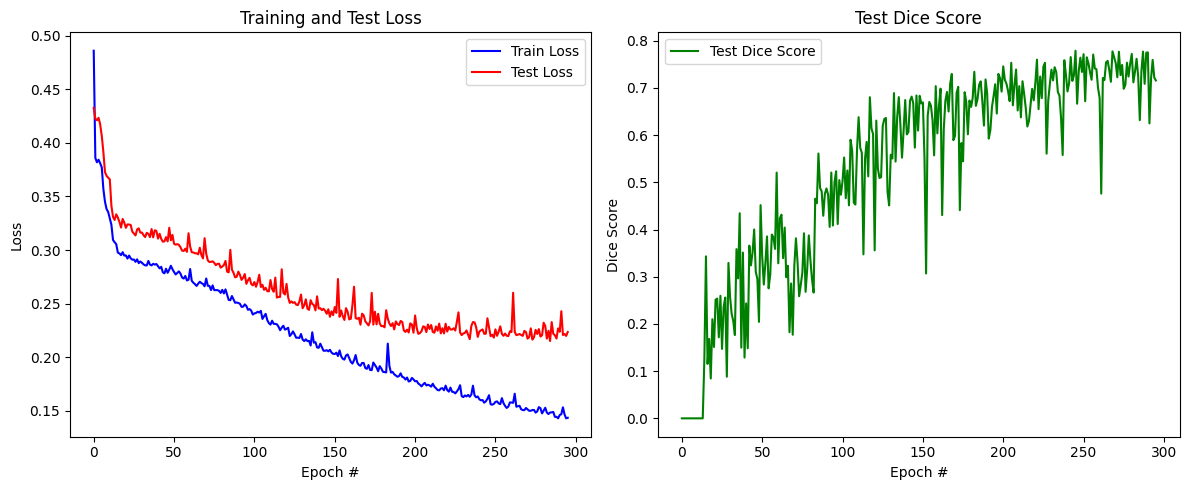

In [9]:
# Plot the training and test loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.plot(train_loss, label="Train Loss", color='blue')
plt.plot(test_loss, label="Test Loss", color='red')
plt.title("Training and Test Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.plot(test_dice, label="Test Dice Score", color='green')
plt.title("Test Dice Score")
plt.xlabel("Epoch #")
plt.ylabel("Dice Score")
plt.legend()

# Show the plots
plt.tight_layout()  # Adjust layout for better visualization
plt.show()